In [193]:
import numpy as np
from sklearn.decomposition import PCA
from numpy import linalg as LA
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.pyplot import figure
import math as m 
import csv
import pandas as pd
from sklearn import preprocessing

file = open('psycho.txt','r')
data = file.read()
data

'"distant" "talkatv" "carelss" "hardwrk" "anxious" "agreebl" "tense" "kind" "opposng" "relaxed" "disorgn" "outgoin" "approvn" "shy" "discipl" "harsh" "persevr" "friendl" "worryin" "respnsi" "contrar" "sociabl" "lazy" "coopera" "quiet" "organiz" "criticl" "lax" "laidbck" "withdrw" "givinup" "easygon"\n"1" 2 7 1 4 7 8 5 9 5 6 3 2 7 9 5 5 8 9 9 9 5 9 7 9 9 5 5 5 7 5 5 8\n"2" 3 8 2 7 5 8 4 8 5 7 5 8 7 6 7 3 7 7 5 7 5 8 2 7 6 6 4 3 7 2 2 7\n"3" 6 6 2 5 1 8 2 9 2 8 7 6 7 5 5 2 5 8 3 9 2 8 5 8 7 4 5 5 7 6 2 8\n"4" 3 7 6 7 8 8 2 8 3 7 2 5 6 4 6 2 8 8 3 8 2 6 3 8 4 7 6 6 6 4 3 7\n"5" 7 3 3 5 8 6 7 2 3 3 5 2 5 8 7 5 6 2 8 7 3 2 6 6 7 5 5 3 3 7 5 5\n"6" 7 6 7 6 7 8 7 8 5 5 6 5 6 8 5 3 6 7 7 7 5 4 5 7 8 6 6 4 4 6 4 7\n"7" 3 6 8 6 6 7 3 5 3 7 7 8 7 5 7 2 4 8 6 2 2 9 6 6 4 4 6 9 9 2 3 8\n"8" 7 6 2 9 7 8 6 7 2 4 4 6 5 4 8 6 8 6 5 8 5 7 4 8 6 6 4 3 2 5 6 6\n"9" 2 6 2 8 2 7 4 7 4 8 3 8 7 3 6 4 8 8 2 8 3 8 3 8 5 7 7 3 6 3 1 7\n"10" 4 7 3 6 3 7 3 7 5 6 3 5 7 5 7 6 7 6 4 7 4 7 3 7 5 6 5 3 4 4 2 5\n"11" 3 

In [60]:
regressors = []
data_mat = []

with open('psycho.txt', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for i,row in enumerate(csv_reader):
        items = list(row.items())        
        i = items[0][1]
        i = [int(x) for x in i.split()]
        i.pop(0)
        data_mat.append(i)
        regressors = items[0][0]
        regressors = [x for x in regressors.split()]

data_mat = np.asarray(data_mat)

In [197]:
## PCA 

S_cov = np.cov(data_mat.transpose())

eigenValues_cov, eigenVectors_cov = LA.eigh(S_cov)
idx_cov = eigenValues_cov.argsort()[::-1]   
eigenValues_cov = eigenValues_cov[idx_cov]
eigenVectors_cov = eigenVectors_cov[:,idx_cov]
eigenVectors_cov = eigenVectors_cov / np.linalg.norm(eigenVectors_cov)

print("Explained variance correlation")
explained_var_cov = [sum(eigenValues_cov[0:i])/np.matrix.trace(S_cov) for i in range(0,33)]

print("Covariance")
for i in range(1,10):
    print(str(i) + " pc gives "+ str(round(explained_var_cov[i]*100,2)) + 
          "% explained variance.")

Explained variance correlation
Covariance
1 pc gives 22.98% explained variance.
2 pc gives 38.45% explained variance.
3 pc gives 48.9% explained variance.
4 pc gives 55.85% explained variance.
5 pc gives 61.27% explained variance.
6 pc gives 65.41% explained variance.
7 pc gives 68.18% explained variance.
8 pc gives 70.77% explained variance.
9 pc gives 73.17% explained variance.


In [199]:
nr_of_eigV = 3
values = eigenVectors_cov[:,0:nr_of_eigV]
names = ["distant","talkatv","carelss","hardwrk","anxious","agreebl",
 "tense","kind","opposng","relaxed","disorgn","outgoin","approvn","shy","discipl","harsh","persevr","friendl",
 "worryin","respnsi","contrar","sociabl","lazy","coopera","quiet","organiz","criticl","lax","laidbck","withdrw",
 "givinup","easygon"]
df = pd.DataFrame(np.array(values.transpose()), columns=names)
df

,distant,talkatv,carelss,hardwrk,anxious,agreebl,tense,kind,opposng,relaxed,...,lazy,coopera,quiet,organiz,criticl,lax,laidbck,withdrw,givinup,easygon
0,-0.042859,0.033052,-0.032679,0.020886,-0.034077,0.012174,-0.036777,0.019709,-0.019200,0.020932,...,-0.039814,0.019134,-0.046763,0.036324,-0.016498,-0.010177,0.012071,-0.050819,-0.038332,0.019628
1,-0.010813,0.016788,0.040404,-0.034874,-0.033342,0.008722,-0.043179,-0.010408,-0.001313,0.043494,...,0.041956,0.000817,-0.015723,-0.059518,-0.025102,0.042475,0.048998,-0.011105,0.010464,0.032467
2,0.021761,-0.058415,-0.034816,-0.009527,-0.042296,0.010548,-0.048102,0.009129,-0.038316,0.037951,...,-0.011726,0.013249,0.051980,0.020909,-0.028848,0.002043,0.025356,0.028894,-0.002018,0.016213


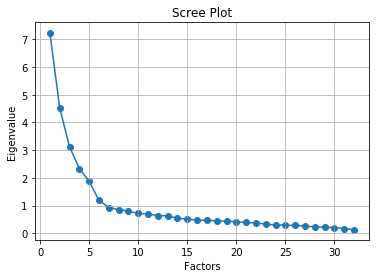

In [216]:
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

df = pd.DataFrame(np.array(data_mat), columns=names)

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

fa = FactorAnalyzer(rotation=None)
fa.fit(df)
FactorAnalyzer(is_corr_matrix=False,
        method='minres', rotation=None, rotation_kwargs={},
        use_smc=True)
ev, v = fa.get_eigenvalues()
ev

plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [224]:
fa = FactorAnalyzer(rotation=None)
fa.fit(df)
FactorAnalyzer(is_corr_matrix=False,
        method='minres', rotation=None, rotation_kwargs={},
        use_smc=True, n_factors=6)
load_mat = pd.DataFrame(np.array(fa.loadings_).transpose(), columns = names)
load_mat
#fa.get_factor_variance()

,distant,talkatv,carelss,hardwrk,anxious,agreebl,tense,kind,opposng,relaxed,...,lazy,coopera,quiet,organiz,criticl,lax,laidbck,withdrw,givinup,easygon
0,0.584465,-0.496627,0.436120,-0.421456,0.348661,-0.298566,0.400467,-0.481326,0.312126,-0.286107,...,0.509336,-0.475312,0.565819,-0.459536,0.231458,0.142114,-0.136419,0.712565,0.610882,-0.308302
1,0.167582,-0.227340,-0.395144,0.536521,0.327674,-0.148319,0.449042,0.132912,0.045649,-0.516103,...,-0.440741,-0.043403,0.188287,0.563785,0.300401,-0.495310,-0.528605,0.178258,-0.131534,-0.424870
2,-0.152086,0.576992,0.272556,0.116241,0.220878,-0.248083,0.311081,-0.219776,0.429737,-0.347444,...,0.065027,-0.297852,-0.485570,-0.127394,0.309661,-0.044006,-0.188839,-0.241883,0.009514,-0.187269
